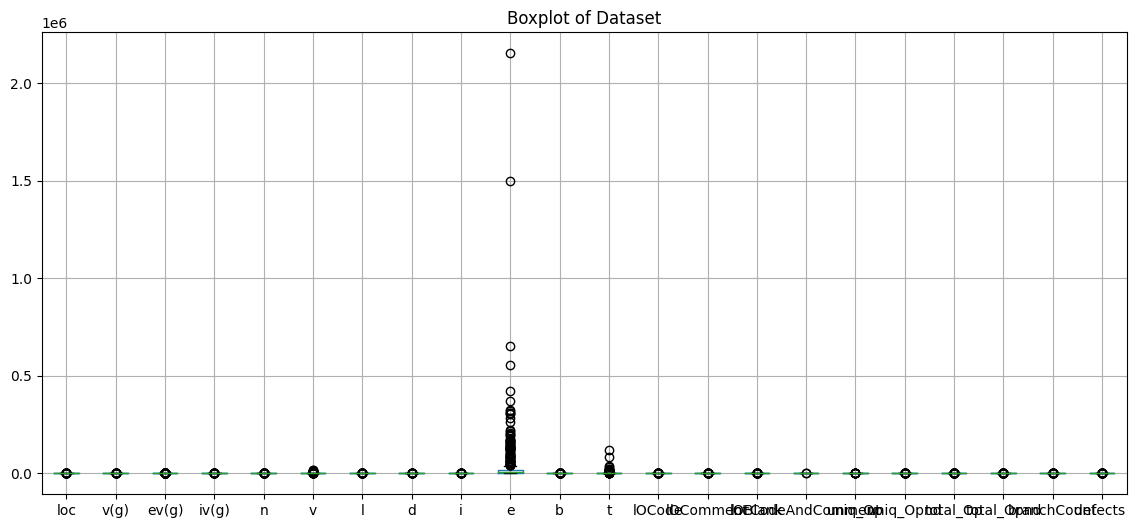

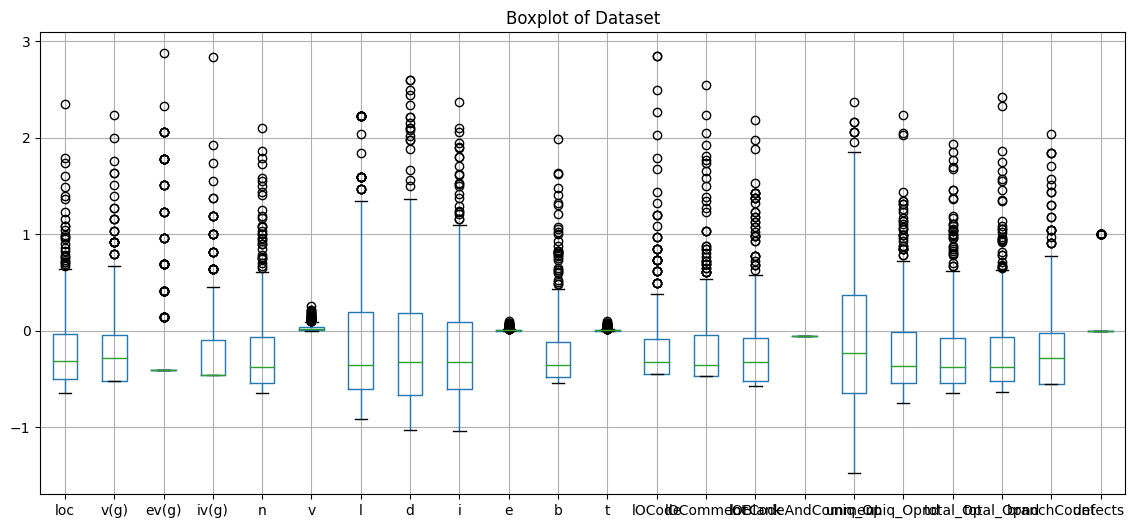

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Step 2: Load the dataset
data = pd.read_csv("CM1.csv")

plt.figure(figsize=(14, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()

exclude_column = 'defects '  # Specify the column to exclude
columns_to_process = [col for col in data.columns if col != exclude_column]



scaler = StandardScaler()
data[columns_to_process] = scaler.fit_transform(data[columns_to_process])

column_data = data[['e']]  # Extract the column you want to scale
scaler = MinMaxScaler()
scaled_column = scaler.fit_transform(column_data)
data['e'] = scaled_column

column_data = data[['t']]  # Extract the column you want to scale
scaler = MinMaxScaler()
scaled_column = scaler.fit_transform(column_data)
data['t'] = scaled_column

column_data = data[['v']]  # Extract the column you want to scale
scaler = MinMaxScaler()
scaled_column = scaler.fit_transform(column_data)
data['v'] = scaled_column

z_scores = np.abs((data[columns_to_process] - data[columns_to_process].mean()) / data[columns_to_process].std())
threshold = 3  # Set the threshold for outlier detection
data = data[(z_scores < threshold).all(axis=1)]

plt.figure(figsize=(14, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()


In [3]:
data
column_values = data.loc[:, 'defects ']
print(column_values)

2      False
3      False
4      False
5      False
6      False
       ...  
493     True
494     True
495     True
496     True
497     True
Name: defects , Length: 446, dtype: bool


In [4]:
model = LinearRegression()

X = data.drop('defects ', axis=1)
y = data['defects '].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)


In [12]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error: 0.35298469714247654
R-squared: 0.8333333333333334


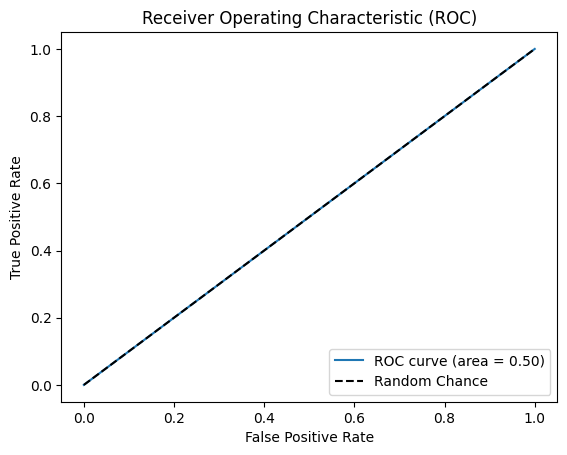

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        76
           1       0.00      0.00      0.00        14

    accuracy                           0.84        90
   macro avg       0.42      0.50      0.46        90
weighted avg       0.71      0.84      0.77        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_prob)
print(report)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Step 2: Load the dataset
data = pd.read_csv("CM1.csv")

exclude_column = 'defects '  # Specify the column to exclude
columns_to_process = [col for col in data.columns if col != exclude_column]

z_scores = np.abs((data[columns_to_process] - data[columns_to_process].mean()) / data[columns_to_process].std())
threshold = 3  # Set the threshold for outlier detection
data = data[(z_scores < threshold).all(axis=1)]

scaler = StandardScaler()
data[columns_to_process] = scaler.fit_transform(data[columns_to_process])

column_data = data[['e']]  # Extract the column you want to scale
scaler = MinMaxScaler()
scaled_column = scaler.fit_transform(column_data)
data['e'] = scaled_column

column_data = data[['t']]  # Extract the column you want to scale
scaler = MinMaxScaler()
scaled_column = scaler.fit_transform(column_data)
data['t'] = scaled_column

column_data = data[['v']]  # Extract the column you want to scale
scaler = MinMaxScaler()
scaled_column = scaler.fit_transform(column_data)
data['v'] = scaled_column

X = data.drop('defects ', axis=1)
y = data['defects '].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score



model = SVC(probability=True)

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.8444444444444444
Root Mean Squared Error: 0.39440531887330776
R-squared: 0.8444444444444444


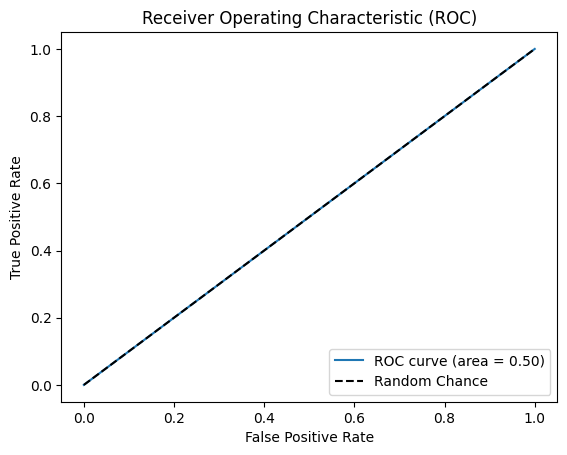

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        76
           1       1.00      0.00      0.00        14

    accuracy                           0.84        90
   macro avg       0.92      0.50      0.46        90
weighted avg       0.87      0.84      0.77        90



In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_prob,zero_division=1)
print(report)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.8444444444444444
Confusion Matrix:
[[75  1]
 [13  1]]
AUC: 0.7847744360902256
Root Mean Squared Error: 0.39440531887330776
R-squared: 0.8444444444444444


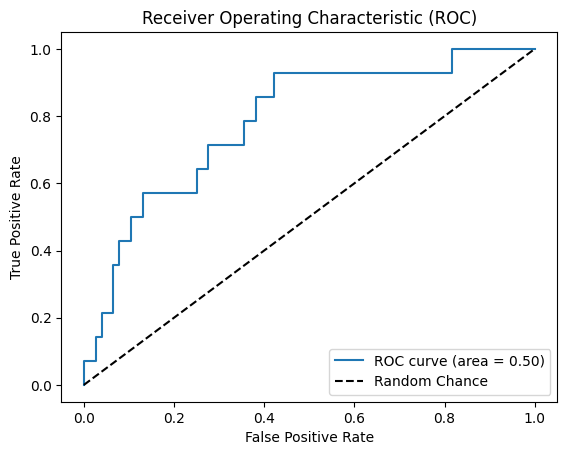

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.8333333333333334
Confusion Matrix:
[[75  1]
 [14  0]]
AUC: 0.737781954887218
Root Mean Squared Error: 0.35298469714247654
R-squared: 0.8333333333333334


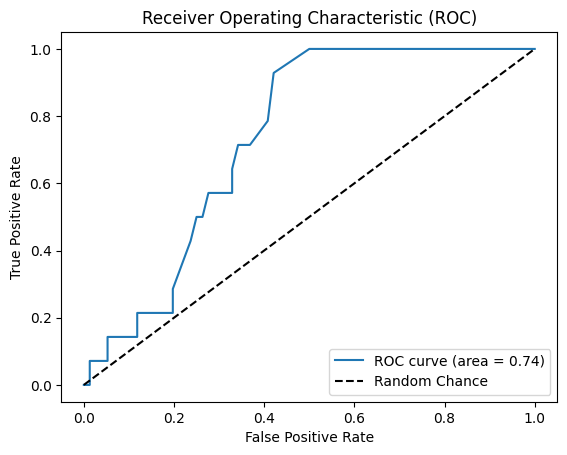

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        76
           1       0.00      0.00      0.00        14

    accuracy                           0.83        90
   macro avg       0.42      0.49      0.45        90
weighted avg       0.71      0.83      0.77        90

